In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
# Importing the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
df['length'] = df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


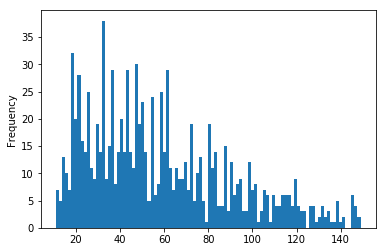

In [4]:
df['length'].plot(bins=100,kind='hist') 


In [5]:
df.length.describe()


count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [6]:
#Longest review
df[df['length'] == 149]['Review'].iloc[0]


'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [7]:
#Shortest review
df[df['length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ab0836438>,
      dtype=object)

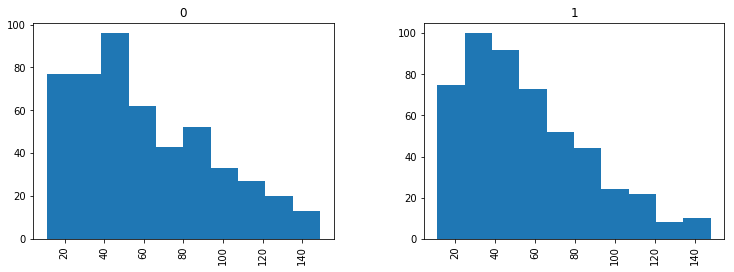

In [8]:
df.hist(column='length', by='Liked',figsize=(12,4))


In [9]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [10]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [11]:
# Creating the Bag of Words model


from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Naive Bayes

In [13]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score


y_pred = mnb.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)*100
print("Accuracy: {}".format(accuracy1))

Accuracy: 76.5


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

In [16]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=None)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

   micro avg       0.77      0.77      0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



# Adaboost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=10,base_estimator=mnb, learning_rate=1)
abc.fit(x_train,y_train)



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          learning_rate=1, n_estimators=10, random_state=None)

In [18]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score


y_pred = abc.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)*100
print("Accuracy: {}".format(accuracy2))

Accuracy: 70.0


In [19]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=None)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.95      0.75        97
           1       0.91      0.47      0.62       103

   micro avg       0.70      0.70      0.70       200
   macro avg       0.77      0.71      0.68       200
weighted avg       0.77      0.70      0.68       200

